In [1]:
# Import required library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
import os
print(os.listdir("data"))

['train.csv', 'sample_submission.csv', 'test.csv']


#### Data Understanding

In [3]:
train_dataset =  pd.read_csv("data/train.csv")
test_dataset = pd.read_csv("data/test.csv")

In [4]:
train_dataset.shape
test_dataset.shape

(28000, 784)

In [5]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Checking for null values
train_dataset.isnull().any().sum()
test_dataset.isnull().any().sum()

0

In [8]:
# Describing data
test_dataset.describe()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
train_dataset.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
# Dimesnion of data
print(test_dataset.shape)
print (train_dataset.shape)

(28000, 784)
(42000, 785)


In [11]:
print(test_dataset.columns)
print (train_dataset.columns)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [12]:
order = list(np.sort(train_dataset['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/dipesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

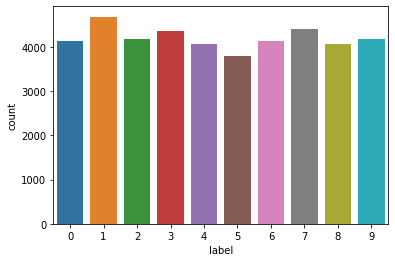

In [13]:
# Visualizing the number of class and counts in the datasets.
sns.countplot(train_dataset["label"])

/home/dipesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

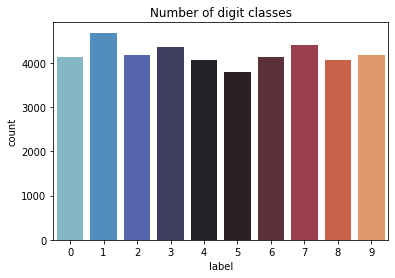

In [14]:
plt.plot(figure = (16,10))
g = sns.countplot(train_dataset["label"], palette='icefire')
plt.title("Number of digit classes")
train_dataset.label.astype('category').value_counts()

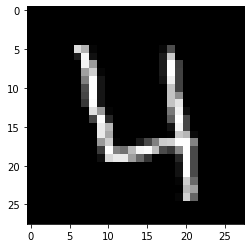

In [15]:
# Plotting some samples digits 
digit = train_dataset.iloc[3,1:]
digit.shape
digit = digit.values.reshape(28,28)
plt.imshow(digit,cmap='gray')


Text(0.5, 1.0, 'Digit 7')

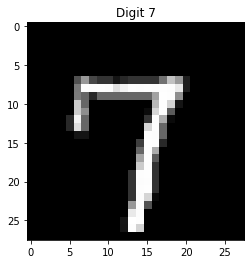

In [16]:
# Plotting digit seven.
seven = train_dataset.iloc[6,1:]
seven.shape
seven = seven.values.reshape(28,28)
plt.imshow(seven,cmap='gray')
plt.title("Digit 7")

#### Data Preparation:
First we rescale the features before modelling


In [17]:
# averge features values
round(train_dataset.drop('label',axis=1).mean(),2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [18]:
#  Separating the X and Y variables
y = train_dataset['label']
x = train_dataset.drop(columns='label')

In [19]:
# Normalizing data
x = x/255.0
test_dataset = test_dataset/255.0

In [20]:
print ('x:',x.shape)
print ('test_data:', test_dataset.shape);

x: (42000, 784)
test_data: (28000, 784)


#### Features Scalling:

In [21]:
from sklearn.preprocessing import scale
x_scaled = scale(x)

In [22]:
# Test-Train split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.3, train_size = 0.2, random_state=10)

#### Building a Model:
Buildling two basics model with default hyperparameter, comapare the performance.

##### Linear Model

In [23]:
linear_model = SVC(kernel = 'linear')
linear_model.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
y_predict = linear_model.predict(x_test)

In [30]:
# Confusion Matrix:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Accuracy
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_predict)
print("Accuracy:",accuracy)
cm = metrics.confusion_matrix(y_true = y_test, y_pred = y_predict)
cm

Accuracy: 0.9133333333333333


array([[1160,    0,    0,    1,    6,    6,   12,    1,    1,    1],
       [   0, 1389,    3,    4,    3,    0,    0,    2,   12,    0],
       [   9,   11, 1146,   38,   11,    4,   10,   12,   17,    2],
       [   5,    4,   35, 1204,    0,   51,    2,    3,   21,    6],
       [   3,    3,   20,    3, 1132,    1,   10,    4,    2,   40],
       [   9,   17,   10,   67,    7,  997,   14,    2,   19,    7],
       [  15,    2,   15,    0,    9,   15, 1160,    1,    2,    0],
       [   5,   12,   18,    9,   26,    2,    1, 1212,    3,   42],
       [   8,   31,   24,   45,    8,   61,    9,   14, 1002,   15],
       [   9,    6,    7,   28,   56,    3,    0,   53,    7, 1106]])

Text(69.0, 0.5, 'Truth')

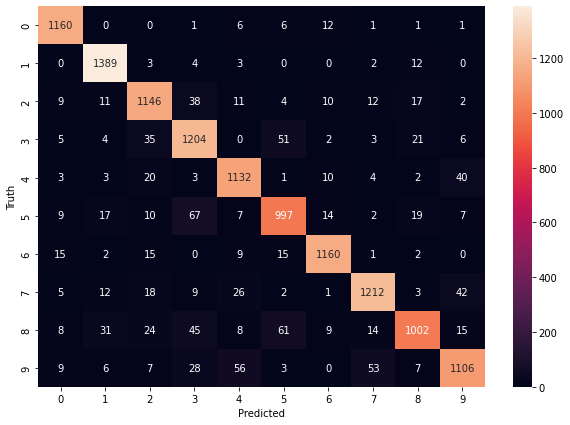

In [31]:
# Usisng seaborn for visualizing confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Non-Linear model:
Using rbf kernel, C=1 , default value of gamma.

In [32]:
# Model
non_linear_model = SVC(kernel='rbf')
# Fittin model
non_linear_model.fit(x_train,y_train)
# Prediction
y_predict = non_linear_model.predict (x_test)


#### Confusion Matrix and Accuracy:

In [35]:
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_predict)
cm = metrics.confusion_matrix (y_true = y_test, y_pred = y_predict)
print('Accuracy:', accuracy)
print ('Confussion Matrix', cm)

Accuracy: 0.9348412698412698
Confussion Matrix [[1156    0    5    1    0    2   12    6    5    1]
 [   0 1389    4    3    4    0    2    6    5    0]
 [   2    4 1170   19    5    0    9   35   15    1]
 [   1    4   19 1237    0   20    2   32   13    3]
 [   0    4   25    0 1133    0    9   17    3   27]
 [   1    9    5   42    3 1047   17   11    8    6]
 [  13    2    5    0    2   15 1156   24    2    0]
 [   3   10    9    3   15    0    0 1256    1   33]
 [   5   19   14   25    7   21    8   15 1095    8]
 [   4    4    6   30   23    2    1   61    4 1140]]


Text(69.0, 0.5, 'Truth')

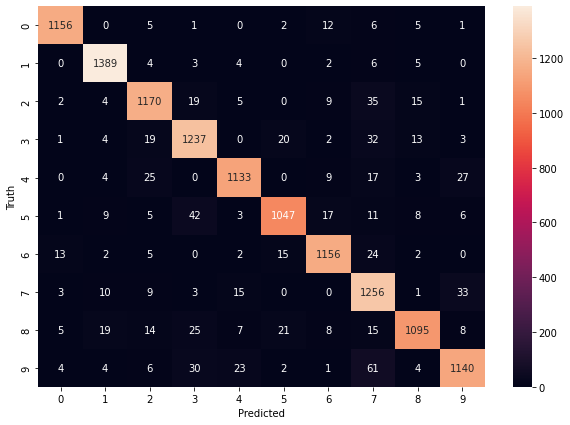

In [36]:
# Usisng seaborn for visualizing confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')